In [50]:
from cProfile import label

import numpy as np
import torch
import torch.nn as nn
import seaborn as sns # for loading dataset

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")


In [51]:
# import dataset
iris = sns.load_dataset('iris')

# convert pandas to tensor
data = torch.tensor(iris[iris.columns[0:4]].values, dtype=torch.float)

# label encoding
labels = torch.zeros(data.shape[0],dtype=torch.long)

labels[iris.species == "versicolor"] = 1
labels[iris.species == "virginica"] = 2

### Separate date into train and test

In [37]:
propTraining = .8
nTraining = int(len(labels) * propTraining)

# init a boolean vector to select data and labels
trainTestBool = np.zeros(len(labels),dtype=bool)

# not a good way 
# trainTestBool[range(nTraining)] = True

train_set = np.random.choice(range(len(labels)),nTraining,replace=False)
trainTestBool[train_set] = True

In [38]:
# test whether it's balanced
print("Average of full data:")
print(torch.mean(labels.float()),end="\n\n")

print("Average of training data:")
print(torch.mean(labels[trainTestBool].float()),end="\n\n")

print("Average of test data:")
print(torch.mean(labels[~trainTestBool].float()),end="\n\n")

Average of full data:
tensor(1.)

Average of training data:
tensor(0.9667)

Average of test data:
tensor(1.1333)



In [39]:
# create the ANN model
ANNiris = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3),
)

lossFn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

### Train and test model

In [40]:
num_epochs = 1000

losses = torch.zeros(num_epochs)
onGoingAcc = []

for epochI in range(num_epochs):
    
    yHat = ANNiris(data[trainTestBool,:])
    
    onGoingAcc.append(100*torch.mean((torch.argmax(yHat,dim=1)==labels[trainTestBool]).float()))
    
    loss = lossFn(yHat,labels[trainTestBool])
    losses[epochI] = loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

In [41]:
# final forward pass using training data 
trainPredictions = ANNiris(data[trainTestBool,:])
trainAcc = 100*torch.mean((torch.argmax(trainPredictions,dim=1)==labels[trainTestBool]).float())

# final forward pass using test data
testPredictions = ANNiris(data[~trainTestBool,:])
testAcc = 100*torch.mean((torch.argmax(testPredictions,dim=1)==labels[~trainTestBool]).float())

In [42]:
# report acc 

print("Final train acc: %g%%"%trainAcc)
print("Final test acc: %g%%"%testAcc)

Final train acc: 97.5%
Final test acc: 100%


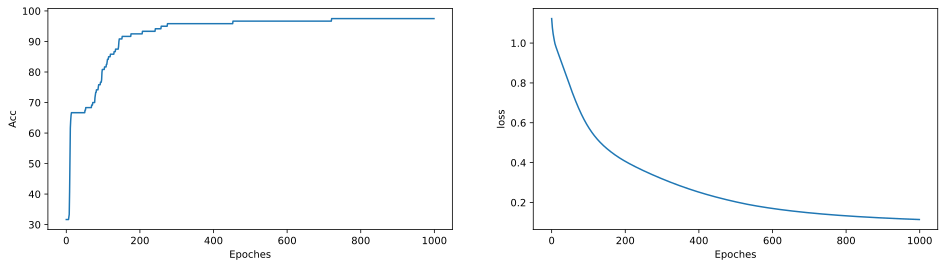

In [48]:

fig, ax = plt.subplots(1,2,figsize=(16,4))

ax[0].plot(onGoingAcc)
ax[0].set_xlabel("Epoches")
ax[0].set_ylabel("Acc")

ax[1].plot(losses)
ax[1].set_xlabel("Epoches")
ax[1].set_ylabel("loss") 
plt.show()
